# WeatherPy
----


In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Import API Key
from api_keys import weather_api_key

# Get API url 
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty columns 
weather_df = pd.DataFrame()
weather_df['City'] = cities
weather_df['Lat'] = ""
weather_df['Long'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['Wind Speed'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""

#City name formatting 
weather_df['City'] = weather_df['City'].str.title()

weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,,,,,,,,
1,Chlorakas,,,,,,,,
2,Mataura,,,,,,,,
3,Hilo,,,,,,,,
4,Nizhneyansk,,,,,,,,
...,...,...,...,...,...,...,...,...,...
624,Ovalle,,,,,,,,
625,Mions,,,,,,,,
626,Glenwood Springs,,,,,,,,
627,Mutsamudu,,,,,,,,


In [4]:
## API calls 

print('Beginning Data Retrieval')
print('------------------------------------')

# Loop through cities and get weather. Pass if city has no data.
for index, row in weather_df.iterrows():
    
    # Get city name from dataframe 
    city = row['City']
    
    # Generate query url 
    query_url = weather_url + 'q=' + city + '&appid=' + weather_api_key
    
    try:
        # Retrieve data 
        response = requests.get(query_url).json()
        
        # Add response to column 
        print(f"Retrieving results for response {index}: {city}.")
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Long'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
    
    # Skip results with no data
    except KeyError:
        print(f'No Results for {city}... skipping')
    
    
print('------------------------------------')
print('Data Retrieval Complete')
    

Beginning Data Retrieval
------------------------------------
Retrieving results for response 0: Coquimbo.
Retrieving results for response 1: Chlorakas.
Retrieving results for response 2: Mataura.
Retrieving results for response 3: Hilo.
Retrieving results for response 4: Nizhneyansk.
No Results for Nizhneyansk... skipping
Retrieving results for response 5: Phan Thiet.
Retrieving results for response 6: Ushuaia.
Retrieving results for response 7: Busselton.
Retrieving results for response 8: Upernavik.
Retrieving results for response 9: Kodinar.
Retrieving results for response 10: Marcona.
No Results for Marcona... skipping
Retrieving results for response 11: Leningradskiy.
Retrieving results for response 12: Umzimvubu.
No Results for Umzimvubu... skipping
Retrieving results for response 13: Punta Arenas.
Retrieving results for response 14: Avarua.
Retrieving results for response 15: Jamestown.
Retrieving results for response 16: Belyy Yar.
Retrieving results for response 17: Juneau.
R

Retrieving results for response 162: Yenagoa.
Retrieving results for response 163: Selikhino.
Retrieving results for response 164: Sabha.
Retrieving results for response 165: Provideniya.
Retrieving results for response 166: Touros.
Retrieving results for response 167: Tidore.
No Results for Tidore... skipping
Retrieving results for response 168: Esperance.
Retrieving results for response 169: Mongo.
Retrieving results for response 170: Saint-Philippe.
Retrieving results for response 171: Drolshagen.
Retrieving results for response 172: Puerto Penasco.
Retrieving results for response 173: Gander.
Retrieving results for response 174: Chuy.
Retrieving results for response 175: Paramonga.
Retrieving results for response 176: Sambava.
Retrieving results for response 177: Mana.
Retrieving results for response 178: Narsaq.
Retrieving results for response 179: Daman.
Retrieving results for response 180: Portland.
Retrieving results for response 181: Fort Nelson.
Retrieving results for respons

Retrieving results for response 330: Mapiripan.
Retrieving results for response 331: Kamaishi.
Retrieving results for response 332: College.
Retrieving results for response 333: Muisne.
Retrieving results for response 334: Komsomolskiy.
Retrieving results for response 335: Port Victoria.
Retrieving results for response 336: Ondjiva.
Retrieving results for response 337: La Palma.
Retrieving results for response 338: Burica.
No Results for Burica... skipping
Retrieving results for response 339: Moron.
Retrieving results for response 340: Karuzi.
Retrieving results for response 341: Ambodifototra.
No Results for Ambodifototra... skipping
Retrieving results for response 342: Omsukchan.
Retrieving results for response 343: Amderma.
No Results for Amderma... skipping
Retrieving results for response 344: Nemuro.
Retrieving results for response 345: Nikolskoye.
Retrieving results for response 346: La Ronge.
Retrieving results for response 347: Nome.
Retrieving results for response 348: Mocambi

Retrieving results for response 496: Tala.
Retrieving results for response 497: Lamesa.
Retrieving results for response 498: Puerto Suarez.
Retrieving results for response 499: Ondorhaan.
No Results for Ondorhaan... skipping
Retrieving results for response 500: Fare.
Retrieving results for response 501: Les Cayes.
Retrieving results for response 502: Basyanovskiy.
No Results for Basyanovskiy... skipping
Retrieving results for response 503: Kisac.
Retrieving results for response 504: Vanimo.
Retrieving results for response 505: Jacareacanga.
Retrieving results for response 506: Road Town.
Retrieving results for response 507: Lasa.
Retrieving results for response 508: Dudinka.
Retrieving results for response 509: Kpandae.
Retrieving results for response 510: Safaga.
Retrieving results for response 511: Chara.
Retrieving results for response 512: Vila Franca Do Campo.
Retrieving results for response 513: Lashma.
Retrieving results for response 514: Atambua.
Retrieving results for response

In [5]:
# Export as csv file 
weather_df.to_csv(output_data_file)

# Display dataframe 
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,289.15,88,90,3.09,CL,1612491840
1,Chlorakas,34.8042,32.4083,284.15,87,20,3.09,CY,1612492068
2,Mataura,-46.1927,168.864,296.32,39,99,1.16,NZ,1612492069
3,Hilo,19.7297,-155.09,295.15,73,40,7.2,US,1612491930
4,Nizhneyansk,,,,,,,,
...,...,...,...,...,...,...,...,...,...
624,Ovalle,-30.5983,-71.2003,288.47,79,0,0.99,CL,1612492157
625,Mions,45.6643,4.9499,284.15,100,100,1.03,FR,1612492157
626,Glenwood Springs,39.5505,-107.325,269.26,85,90,4.12,US,1612491879
627,Mutsamudu,,,,,,,,


In [19]:
# Convert data types to numerical and get statistical summary 
numerical_df = weather_df[['Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
numerical_df = numerical_df.apply(pd.to_numeric)
numerical_df.describe().round(2)

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.00,585.00,585.00,585.00,585.00,585.00,5.850000e+02
mean,19.82,16.96,282.68,75.85,53.47,3.53,1.612492e+09
std,33.54,89.98,17.67,17.35,40.67,2.65,7.820000e+01
min,-54.80,-179.17,232.15,17.00,0.00,0.06,1.612491e+09
25%,-9.01,-59.43,271.57,67.00,6.00,1.54,1.612492e+09
50%,24.09,20.07,288.72,80.00,61.00,2.90,1.612492e+09
75%,48.68,100.18,297.04,88.00,96.00,4.74,1.612492e+09
max,78.22,178.42,308.15,100.00,100.00,15.71,1.612492e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100% and drop by index if there are any outliers.

high_humid = numerical_df.loc[numerical_df['Humidity'] > 100].index

if len(high_humid) == 0:
    print('No cities have a humidity > 100%')
if len(high_humid) > 0:
    weather_df = weather_df.drop(high_humid)
    display(weather_df)

No cities have a humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

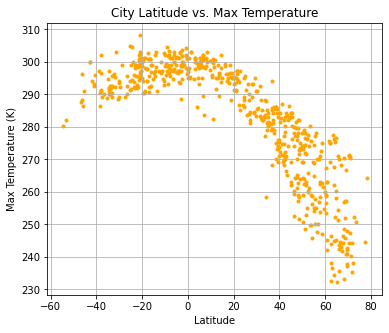

In [96]:
# Get X and Y values
latitude = numerical_df['Lat']
temp = numerical_df['Max Temp']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, temp, marker='.', color='orange')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_temp.png', format='png')

plt.show()

## Latitude vs. Humidity Plot

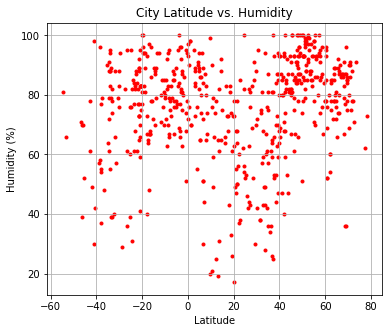

In [87]:
# Get humidity data
humidity = numerical_df['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, humidity, marker='.', color='red')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_humid.png', format='png')

plt.show()

## Latitude vs. Cloudiness Plot

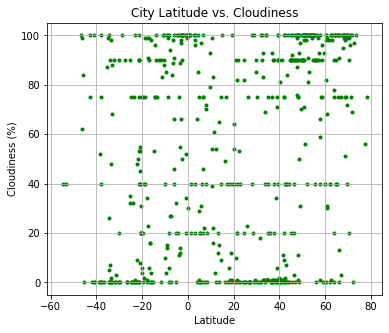

In [98]:
# Get cloudiness data
clouds = numerical_df['Cloudiness']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, clouds, marker='.', color='green')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_cloud.png', format='png')

plt.show()

## Latitude vs. Wind Speed Plot

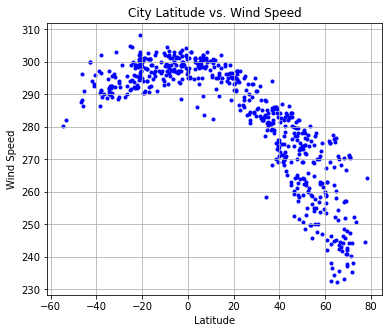

In [89]:
# Get wind speed data
wind = numerical_df['Wind Speed']

# Plot 
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, temp, marker='.', color='b')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_wind.png', format='png')

plt.show()

## Linear Regression

In [90]:
numerical_df

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-29.9533,-71.3436,289.15,88.0,90.0,3.09,1.612492e+09
1,34.8042,32.4083,284.15,87.0,20.0,3.09,1.612492e+09
2,-46.1927,168.8643,296.32,39.0,99.0,1.16,1.612492e+09
3,19.7297,-155.0900,295.15,73.0,40.0,7.20,1.612492e+09
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
624,-30.5983,-71.2003,288.47,79.0,0.0,0.99,1.612492e+09
625,45.6643,4.9499,284.15,100.0,100.0,1.03,1.612492e+09
626,39.5505,-107.3248,269.26,85.0,90.0,4.12,1.612492e+09
627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

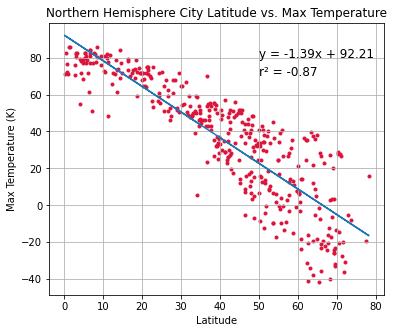

<Figure size 432x288 with 0 Axes>

In [130]:
# Select Northern Hemisphere data
north = numerical_df.loc[numerical_df['Lat'] > 0]

# Get NH Max temp and latitude and convert to farenheit
north_temp = north['Max Temp']
north_temp_f = (north_temp - 273.15) * 9/5 + 32
north_lat = north['Lat']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, north_temp_f, marker='.', color='crimson')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Regression
r_sq = st.pearsonr(north_lat, north_temp_f)
r_sq = r_sq[0].round(2)
NH_temp_r = f"r² = {r_sq}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, north_temp_f)
north_temp_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
regression = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, regression)
plt.annotate(north_temp_eq, (50,80), fontsize=12, color='black')
plt.annotate(NH_temp_r, (50,70), fontsize=12, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_temp.png', format='png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

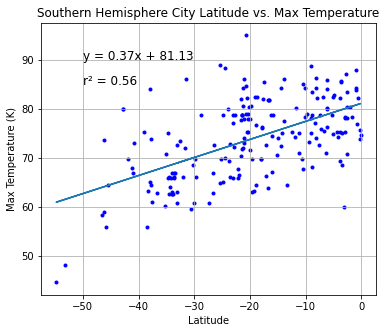

<Figure size 432x288 with 0 Axes>

In [136]:
# Select Northern Hemisphere data
south = numerical_df.loc[numerical_df['Lat'] < 0]

# Get NH Max temp and latitude and convert to F
south_temp = south['Max Temp']
south_temp = (south_temp - 273.15) * 9/5 + 32
south_lat = south['Lat']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, south_temp, marker='.', color='b')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Regression
s_r_sq = st.pearsonr(south_lat, south_temp)
s_r_sq = s_r_sq[0].round(2)
sh_temp_r = f"r² = {s_r_sq}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, south_temp)
south_temp_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_regression = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_regression)
plt.annotate(south_temp_eq, (-50,90), fontsize=12, color='black')
plt.annotate(sh_temp_r, (-50,85), fontsize=12, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_temp.png', format='png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

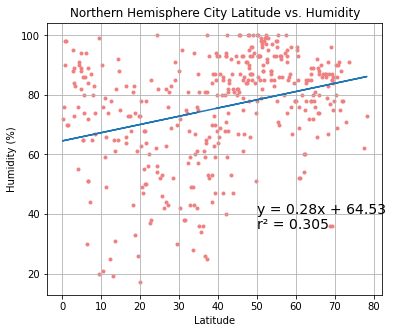

<Figure size 432x288 with 0 Axes>

In [165]:
# Get NH humidity 
nh_humidity = north['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, nh_humidity, marker='.', color='lightcoral')
plt.title('Northern Hemisphere City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Regression
nh_hum_r = st.pearsonr(north_lat, nh_humidity)
nh_hum_r = nh_hum_r[0].round(3)
nh_hum_r = f"r² = {nh_hum_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, nh_humidity)
nh_hum_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
nh_hum_regress = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, nh_hum_regress)
plt.annotate(nh_hum_eq, (50,40), fontsize=14, color='black')
plt.annotate(nh_hum_r, (50,35), fontsize=14, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_humidity.png', format='png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

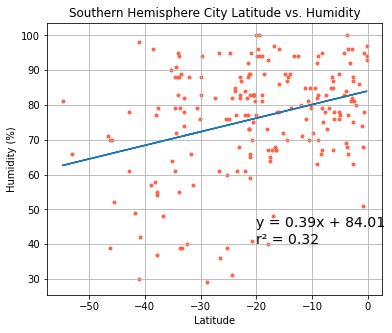

<Figure size 432x288 with 0 Axes>

In [164]:
# Get SH humidity 
sh_humidity = south['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, sh_humidity, marker='.', color='tomato')
plt.title('Southern Hemisphere City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Regression
sh_hum_r = st.pearsonr(south_lat, sh_humidity)
sh_hum_r = sh_hum_r[0].round(2)
sh_hum_r = f"r² = {sh_hum_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, sh_humidity)
sh_hum_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_hum_regress = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_hum_regress)
plt.annotate(sh_hum_eq, (-20,45), fontsize=14, color='black')
plt.annotate(sh_hum_r, (-20,40), fontsize=14, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_humidity.png', format='png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

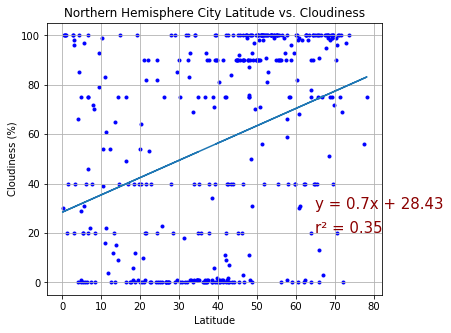

<Figure size 432x288 with 0 Axes>

In [163]:
# Get NH cloudiness 
nh_clouds = north['Cloudiness']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, nh_clouds, marker='.', color='b')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Regression
nh_clouds_r = st.pearsonr(north_lat, nh_clouds)
nh_clouds_r = nh_clouds_r[0].round(2)
nh_clouds_r = f"r² = {nh_clouds_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, nh_clouds)
nh_clouds_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
nh_clouds_regress = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, nh_clouds_regress)
plt.annotate(nh_clouds_eq, (65,30), fontsize=15, color='darkred')
plt.annotate(nh_clouds_r, (65,20), fontsize=15, color='darkred')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_clouds.png', format='png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression